<h3>Import Dataset and necessary Libraries</h3>

In [1]:
#Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Data Analysis</h3>

In [2]:
#Load dataset to dataframe.
df = pd.read_csv("MNIST.csv")

In [3]:
#Show the number of rows and columns of dataframe.
df.shape

(70000, 785)

In [4]:
#List the first 5 rows of dataframe.
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#For simplicity lets take the first 5000 rows for training. Increasing the datapoints will always increase the precision.
df_short = df[0:5000]

In [8]:
df_short.shape

(5000, 785)

In [9]:
x = df_short.drop(columns="label",axis=1)
y = df_short["label"]

In [10]:
x.shape

(5000, 784)

In [11]:
y.shape

(5000,)

<h3>PCA</h3>

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_trans = pca.fit_transform(x)

In [13]:
x_trans.shape

(5000, 2)

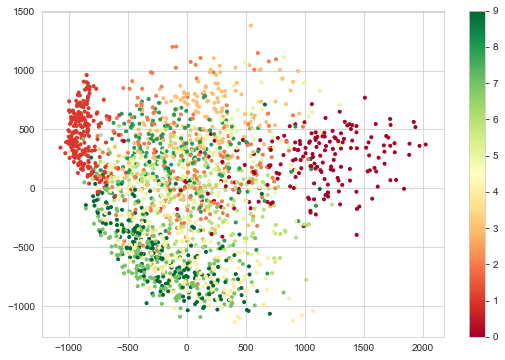

In [14]:
plt.figure(figsize=(9,6))
sns.set_style(style="whitegrid")
plt.scatter(x_trans[:2000,0],x_trans[:2000,1],c=y[:2000],marker=".",cmap="RdYlGn")
plt.colorbar()
plt.show()

In [15]:
pca = PCA(n_components=20)
x_transform = pca.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size=0.2,random_state=4)

In [16]:
from sklearn.metrics import accuracy_score
#from sklearn.metrics import f1_score
#from sklearn.metrics import jaccard_similarity_score

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print(f"Accuracy Score: {accuracy_score(y_test,knn.predict(x_test))}")
#print(f"F1 Test Accuracy Score: {f1_score(y_test,knn.predict(x_test),average="micro")}")
#print(f"Jaccard Similarity Score: {jaccard_similarity_score(y_test,knn.predict(x_test))}")

Accuracy Score: 0.952


<h3>10 Fold Cross Validation</h3>

In [17]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
cv_accuracy = cross_val_score(knn,x_transform,y,cv=10,scoring="accuracy")
print(f"Accuracy Score Obtained: {cv_accuracy}")
print(f"Mean Accuracy Score: {cv_accuracy.mean()}")

Accuracy Score Obtained: [0.94653465 0.9265873  0.94234592 0.96207585 0.956      0.91767068
 0.95381526 0.94779116 0.92957746 0.92943548]
Mean Accuracy Score: 0.9411833784902758


In [18]:
for comp in np.arange(5,55,5):
    pca = PCA(n_components=comp)
    x_new = pca.fit_transform(x)
    for i in np.arange(2,8):
        knn = KNeighborsClassifier(n_neighbors=i)
        cv_accuracy = cross_val_score(knn,x_new,y,cv=10,scoring="accuracy")
        print(f"Components = {comp} | Neighbors = {i} | Accuracy Score = {cv_accuracy.mean()}")

Components = 5 | Neighbors = 2 | Accuracy Score = 0.6780557476131805
Components = 5 | Neighbors = 3 | Accuracy Score = 0.7148821963941364
Components = 5 | Neighbors = 4 | Accuracy Score = 0.7184790170459386
Components = 5 | Neighbors = 5 | Accuracy Score = 0.729850345629077
Components = 5 | Neighbors = 6 | Accuracy Score = 0.7296495659279468
Components = 5 | Neighbors = 7 | Accuracy Score = 0.7354233722721133
Components = 10 | Neighbors = 2 | Accuracy Score = 0.8710293084401435
Components = 10 | Neighbors = 3 | Accuracy Score = 0.8878166308394034
Components = 10 | Neighbors = 4 | Accuracy Score = 0.8916283984328841
Components = 10 | Neighbors = 5 | Accuracy Score = 0.8932101918201024
Components = 10 | Neighbors = 6 | Accuracy Score = 0.8978239650382841
Components = 10 | Neighbors = 7 | Accuracy Score = 0.8966270692355772
Components = 15 | Neighbors = 2 | Accuracy Score = 0.9238015139929576
Components = 15 | Neighbors = 3 | Accuracy Score = 0.932589901523572
Components = 15 | Neighbors 

From the above model, we can confirm an Accuracy score of 97%.

<h3>Hyper parameter tuning using GridSearchCV</h3>

In [19]:
from sklearn.model_selection import GridSearchCV
for i in np.arange(5,55,5):
    new_pca = PCA(n_components=i)
    print("="*90)
    print(f"For Principle Components: {i}")
    print("="*90)
    xtest = new_pca.fit_transform(x)
    parameter = {"n_neighbors": np.arange(2,8)}
    grid_search = GridSearchCV(KNeighborsClassifier(),param_grid=parameter,scoring="accuracy",cv=10)
    grid_search.fit(xtest,y)
    print(f"Best Accuracy Score = {round(grid_search.best_score_,3)}, ie {round(grid_search.best_score_,3)*100}% accuracy")
    print(f"Best Parameter = {grid_search.best_params_}, ie {list(grid_search.best_params_.values())[0]} neighbor")
    print(f"Best Estimator: {grid_search.best_estimator_}")

For Principle Components: 5
Best Accuracy Score = 0.736, ie 73.6% accuracy
Best Parameter = {'n_neighbors': 7}, ie 7 neighbor
Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
For Principle Components: 10
Best Accuracy Score = 0.898, ie 89.8% accuracy
Best Parameter = {'n_neighbors': 6}, ie 6 neighbor
Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')
For Principle Components: 15
Best Accuracy Score = 0.932, ie 93.2% accuracy
Best Parameter = {'n_neighbors': 3}, ie 3 neighbor
Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
For Principle Components: 20
Best Accuracy Score = 0.942, ie 94.19999999999999% 

From the above method we can obtain the maximum Accuracy score at 35 components and 3 neighbors.

<b>Let's take the entire datapoints for KNN model development.</b>

In [30]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x = df.drop(columns="label",axis=1)
y = df["label"]
pca = PCA(n_components=30)
x_transform_full = pca.fit_transform(x)
neighbor = KNeighborsClassifier(n_neighbors=3)
x_train,x_test,y_train,y_test = train_test_split(x_transform_full,y,test_size=0.2,random_state=2)
neighbor.fit(x_train,y_train)
print(f"Accuracy Score: {accuracy_score(y_test,neighbor.predict(x_test))}")

Accuracy Score: 0.9790714285714286


For better and precised Accuracy score, we can use Cross Validation.

In [31]:
from sklearn.model_selection import cross_val_score
cv_accuracy = cross_val_score(neighbor,x_transform_full,y,cv=10,scoring="accuracy")
print(f"Mean Accuracy Score: {cv_accuracy.mean()}")

Mean Accuracy Score: 0.9763996971631901


From the above all evaluation we can confirm the model accuracy of 97%.